# Calculo Multidimensional Parte 6.
## Como graficar 4 dimensiones en 2.

De la clase anteior, tenemos un campo
de $\mathbb{R}^2$ en  $\mathbb{R}^2$.

$$E_x = \frac{x+1}{(x+1)^2 + y^2 } + \frac{x-1}{(x-1)^2 + y^2} .$$
$$E_y = \frac{y}{(x+1)^2 + y^2 } - \frac{y}{(x-1)^2 + y^2} .$$

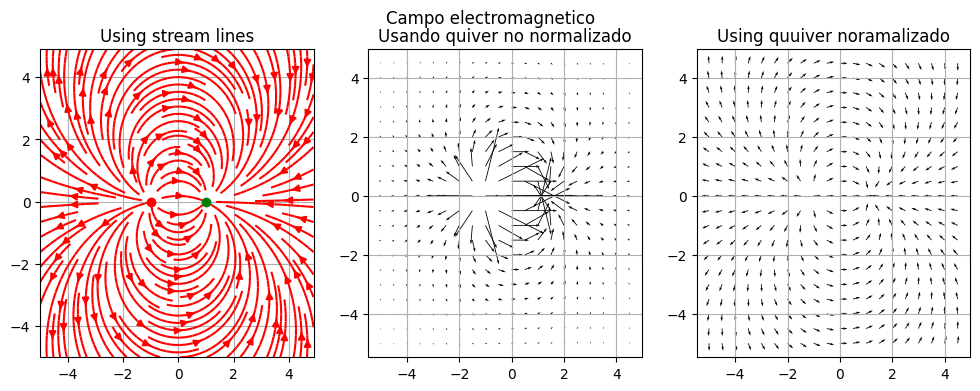

In [1]:
# vamos a ver tres formas distintas de representar el campo
# importar las librerias adecuadas
import numpy as np
import matplotlib.pyplot as plt

epsilon =  10**(-8) # evitar division por cero
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
fig.suptitle("Campo electromagnetico")


# coordenadas
x = np. arange(-5,5, 0.1)
y = np. arange(-5,5, 0.1)


# coordenadas otra grafica
x2 = np. arange(-5,5, 0.5)
y2 = np. arange(-5,5, 0.5)

# creamos las mallas
X,Y = np.meshgrid(x,y)
X2,Y2 = np.meshgrid(x2,y2)


# definimos el cammpo de direcciones
Ex = (X+1)/( (X+1)**2 + Y**2 + epsilon) - (X-1)/((X-1)**2 + Y**2 + epsilon)
Ey = Y/( (X+1)**2 + Y**2 + epsilon) - Y/((X-1)**2 + Y**2 + epsilon)

Ex2 = (X2+1)/( (X2+1)**2 + Y2**2 + epsilon) - (X2-1)/((X2-1)**2 + Y2**2 + epsilon)
Ey2 = Y2/( (X2+1)**2 + Y2**2 + epsilon) - Y2/((X2-1)**2 + Y2**2 + epsilon)

# campo normalizado. Explico luego por que
Ex2n = ((X2+1)/( (X2+1)**2 + Y2**2 + epsilon) - \
     (X2-1)/((X2-1)**2 + Y2**2 + epsilon))/np.sqrt(Ex2**2 + Ey2**2)
Ey2n = (Y2/( (X2+1)**2 + Y2**2 + epsilon) -  \
        Y2/((X2-1)**2 + Y2**2 + epsilon))/np.sqrt(Ex2**2 + Ey2**2)

# tamano de la figura global
plt.rcParams["figure.figsize"]=[16,9]


# elaboracion de las figuras.
ax1.streamplot(X, Y, Ex, Ey, density=1.4, linewidth=None, color='red')
ax1.set_title("Using stream lines")
ax1.plot(-1,0,"-or")
ax1.plot(1,0,"-og")
ax1.grid()


ax2.grid()
ax2.set_title("Usando quiver no normalizado")
ax2.quiver(X2, Y2, Ex2, Ey2)

ax3.set_title("Using quuiver noramalizado")
ax3.quiver(X2, Y2, Ex2n, Ey2n)

ax3.grid()
plt.show()






## Otro tipo de grafica llama `phaseplot`
Aca se ignorma la amplitud $R$ y nos enfocamos solo en la fase.

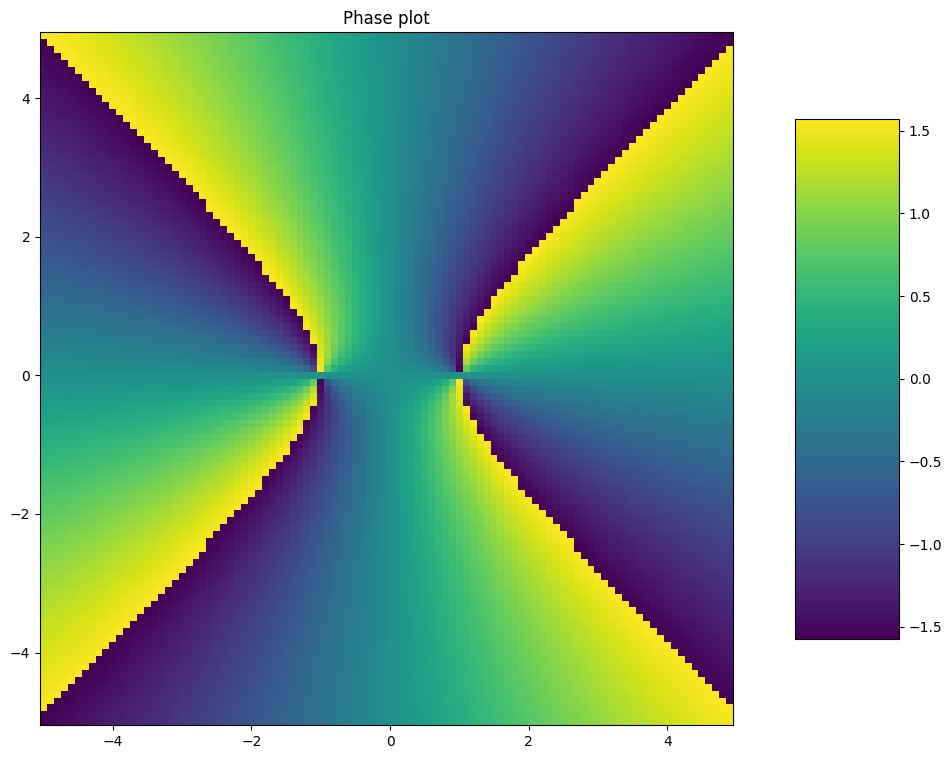

In [2]:
theta = np.arctan(Ey/Ex + epsilon)

heatmap = theta

surf = plt.pcolormesh(X, Y, heatmap)
plt.axis("image")
plt.title("Phase plot")
plt.colorbar(surf, shrink=0.75, aspect=5)
plt.show()

### Actividad # 1
1. Mejore el ejemplo anterior para aumentar a resolucion
2. Exlipque la hiperboa de descontinuidad en fase. Use `SymPy` para obtener la ecuacion de descontinuidad $x^2 - y^1 = 1$. (ayuda= denominador 0)
3. Expique el arco-iris al rededeor de los polos.

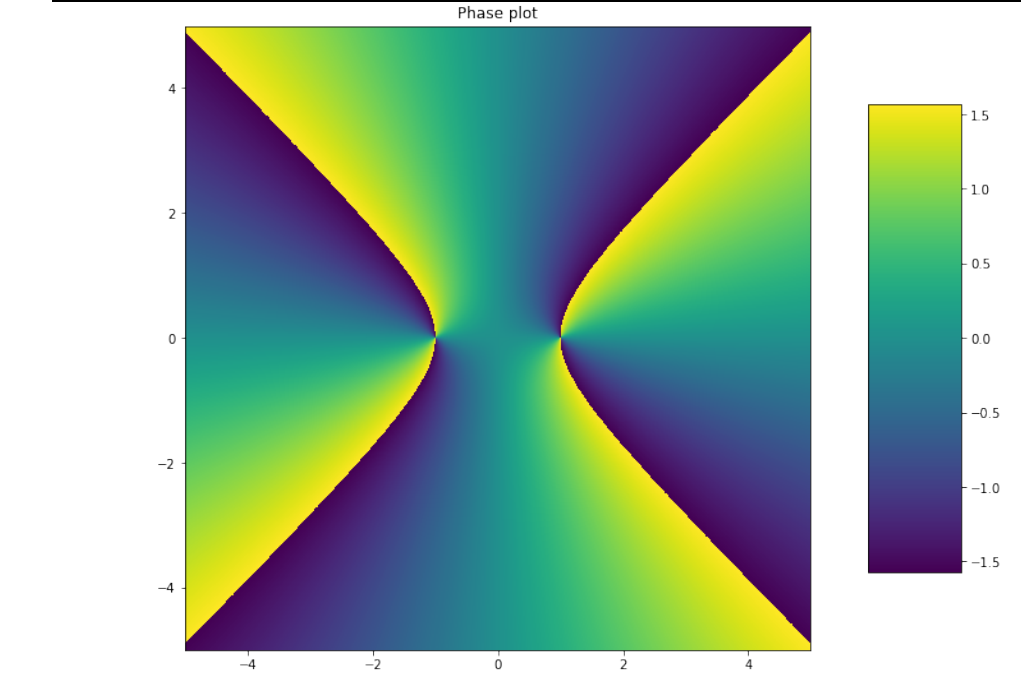

Posible ayuda:
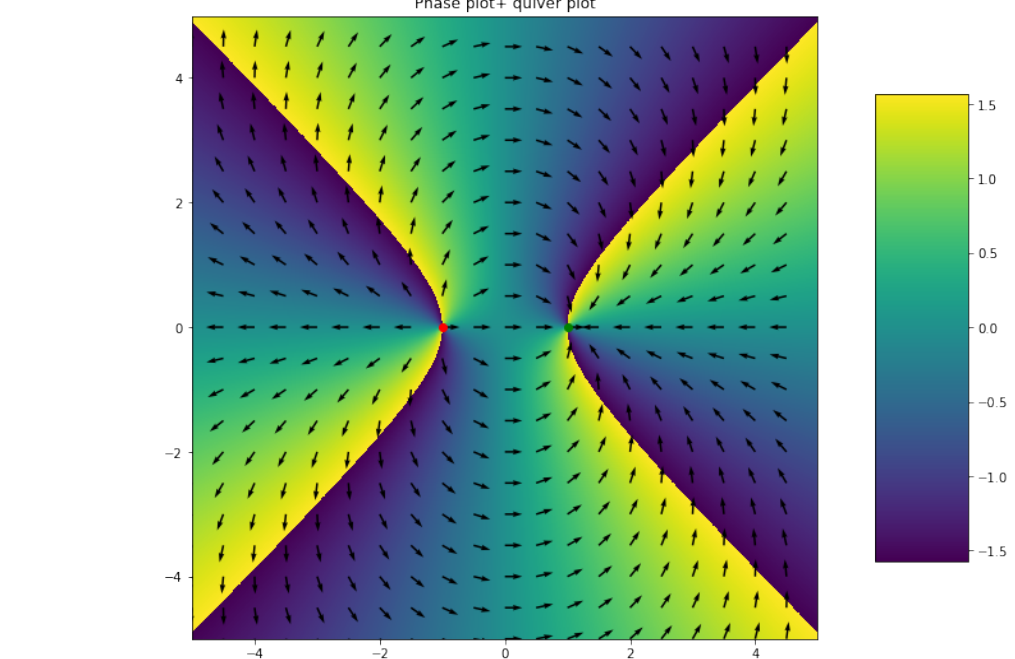


Me debe mostrar esta grafica.

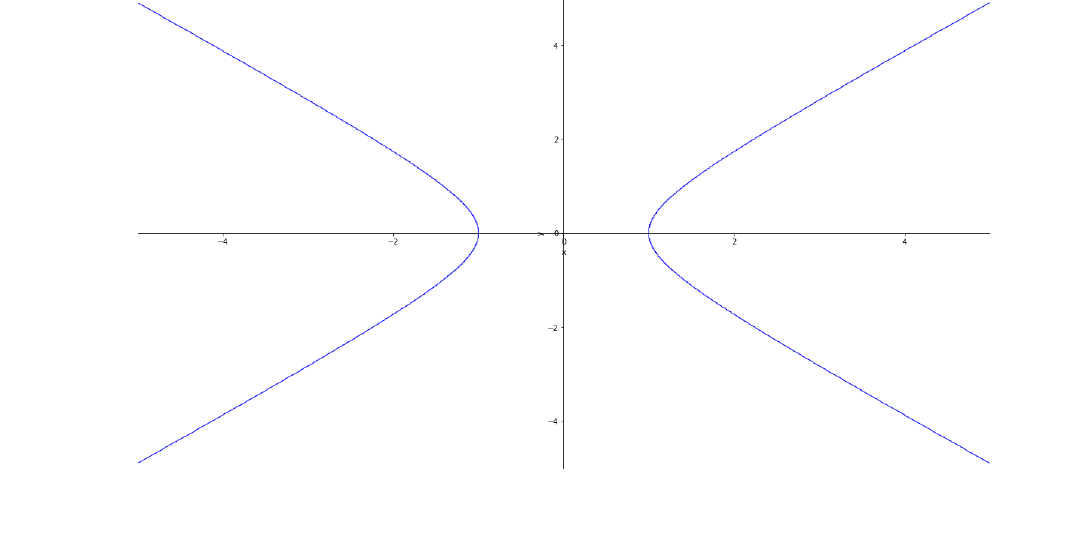

## Campos vectoriales como cambio de coordenada en variables multidimensionales.
### Repaso de sustitucion en integrales simples.

Asuma que usted quiere integrar

$$\int_a^b 2x \sqrt{x^2 - 1} dx .$$
Por sustitucion, nosotros llamamos $u=x^2 -1$ de forma que $du = 2x dx$.
Entonces

$$ \int_a^b 2x \sqrt{2 x^2 -1 } \int_{u(a)}^{u(b)} \sqrt{u} du .$$
Si llamamos $f(u)=\sqrt{u}$ escribimos


$$\int_{u(a)}^{u(b)} f(u) du = \int_a^b f(u(x)) \frac{du}{dx} dx .$$

Nos lanzamos al mundo multidimensional. Asumimos una funcion (cambio de variable) $u : \mathbb{R}^n \to \mathbb{R}^n$ escribimos para
$a,b \in \mathbb{R}^n$

$$\int_{u(a)}^{u(b)} f(u) du = \int_a^b f(u(x)) \left |\det \frac{\partial u_i}{\partial x_j} \right | dx . \quad , \quad i,j=1,2, \cdots , n$$




El termino entre barras se llama **Jacobiano** (Jacob)

$$J = \left ( \frac{\partial u_i}{\partial x_j}   \right )  =
\begin{pmatrix}
\frac{\partial u_1}{\partial x_1} & \frac{\partial u_2}{\partial x_1} & \cdots & \frac{\partial u_n}{\partial x_1} \\
\frac{\partial u_1}{\partial x_2} & \frac{\partial u_2}{\partial x_2} & \cdots & \frac{\partial u_n}{\partial x_2} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial u_1}{\partial x_n} & \frac{\partial u_2}{\partial x_n} & \cdots & \frac{\partial u_n}{\partial x_n} \\
\end{pmatrix}
.$$

Ejemplo, la representacion de una esfera en coordenas esfericas $(r, \theta, \phi)$.

\begin{eqnarray}
S : [0 , \infty) \times [0, 2 \pi ) \times [0 , \pi) &\to& \mathbb{R}^3 (o S^3) \\
\begin{pmatrix} r \\ \phi \\ \theta \end{pmatrix} &\to&
\begin{pmatrix}
r \sin \phi \cos \theta \\
r \sin \phi \sin \theta \\
r \cos \phi
\end{pmatrix}
\end{eqnarray}

### Actividad # 2

* Encuentre el jacobiano para el campo vectorial $S$ en dos formas distintas
    1. Use la funcion `jacobian` de `SimPy`.
    2. Use la definicion con derivadas parciales seguida por el determinante (`diff`)

* Use este jacobiano para mostrar que el volumen de una esfera de radio $R$
esta dado por $V = \frac43 \pi R^3$. Haga todo en `SymPy'

* Bono: Agrego 5 decimas al resultado. Haga todo lo anterior en coordenadas cilindricas.

## Integrales de linea sobre campos vectoriales

El caso tipico es la definicion de trabajo en la fisica. La fuerza es un campo (en varias dimensiones), el desplazamiento tambien. Son vectores.


Es decir,

$$ \int_C F(r) \cdot dr = \int_C F(r(t)) \cdot \frac{dr}{dt} dt  .$$

Veamos esto en `SymPy`

In [3]:
# ejemplos en 3D
from sympy import symbols, Matrix, Function, diff, integrate
t = symbols('t', real=True)
x,y,z,F1,F2,F3 = symbols('x y z F1 F2 F3', cls=Function, real=True)

# trayectoria
x=x(t)
y=y(t)
z=z(t)

# la fuerza
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)

r = Matrix( [x,y,z])
F = Matrix ([F1, F2, F3])

integrand = F.dot(diff(r,t))
integrand



F1(x(t), y(t), z(t))*Derivative(x(t), t) + F2(x(t), y(t), z(t))*Derivative(y(t), t) + F3(x(t), y(t), z(t))*Derivative(z(t), t)

In [4]:
# formulemos la integral entre a y b
a = symbols('a')
b = symbols('b')
integrate( integrand, (t, a, b))


Integral(F1(x(t), y(t), z(t))*Derivative(x(t), t) + F2(x(t), y(t), z(t))*Derivative(y(t), t) + F3(x(t), y(t), z(t))*Derivative(z(t), t), (t, a, b))

Ejemplo: Asuma una particula con fuerza dada  $F=(x,y,3)$ (en el plano de altura $z=3t$. A lo largo de la trayectia helicoidal $r(t)=(4 \cos t, 4 \sin t, 3 t)$.  Encuentre el trabajo total de la particula. El tiempo va entre 0 y 1r.

In [24]:
# hacemos la sustitucion
import sympy as sp
integrand1 = integrand.subs( {
                            F1:x,
                            F2:y,
                            F3:z**2,
                            x : 4*sp.cos(sp.sqrt(t*sp.exp(-t**2))),
                            y : 4*sp.sin(t),
                            z : 3*t
}).doit().simplify()
integrand1


(sqrt(t)*(27*t**2 + 8*sin(2*t))*exp(t**2) + 4*(2*t**2 - 1)*exp(t**2/2)*sin(2*sqrt(t)*exp(-t**2/2)))*exp(-t**2)/sqrt(t)

In [25]:
integrate( integrand1, (t, 0 ,10))

KeyboardInterrupt: 

### Actividad 3
Invente su propio problema con una fuerza $F$ y una trayectoria de su preferencia (que no sea una helice). El ejemplo debe ser tal que la integral no es analitica.




In [8]:
integrate( sp.cos(2*t**2), (t, 0, 1))

sqrt(pi)*fresnelc(2/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

## Integrales de superficie.
Una superficie esta parametrizada por dos parametros.


$$r(u,v) = (x (u,v), y(u,v) z(u,v)) .$$

El area de la superficie esta dada por


$$ A = \iint\limits_S  \left \|  \frac{\partial r}{\partial u}  \times \frac{\partial r}{\partial v}  \right \| du dv $$
Asumimos que se puede calcular la integral

Veamos como calcular el area superficial de una esfera.


In [26]:
u, v = symbols('u, v ', pos=True, real=True)
x, y, z = symbols('x y z', cls=Function, real = True)
x = x(u,v)
y = y(u,v)
z = z(u,v)

r = Matrix( [x, y, z])
integrand = sp.sqrt(
    diff(r,u).cross(diff(r,v)). dot(diff(r,u).cross(diff(r,v)))
    )
integrand

sqrt((Derivative(x(u, v), u)*Derivative(y(u, v), v) - Derivative(x(u, v), v)*Derivative(y(u, v), u))**2 + (-Derivative(x(u, v), u)*Derivative(z(u, v), v) + Derivative(x(u, v), v)*Derivative(z(u, v), u))**2 + (Derivative(y(u, v), u)*Derivative(z(u, v), v) - Derivative(y(u, v), v)*Derivative(z(u, v), u))**2)

Encontremos el area superficial de la esfera

$$r(\theta, \phi) = R( \cos \theta \sin \phi, \sin \theta \sin \phi, \cos \phi) $$

donde
$$ \theta = [0, 2 \pi], \phi \in [0, \pi].$$

In [28]:
R = symbols('R', constant=True, positive=True)

integrand1 = integrand.subs([
            (x, R*sp.cos(u)*sp.sin(v)),
            (y, R*sp.sin(u)*sp.sin(v)),
            (z, R*sp.cos(v))]).doit().simplify()

integrand1




R**2*Abs(sin(v))

In [29]:
int2 = integrate ( integrand1, (u, 0, 2*sp.pi), (v, 0, sp.pi))
int2

4*pi*R**2

# Proxima clase
## Integracion de un campo escalar a lo largo de una superficie.